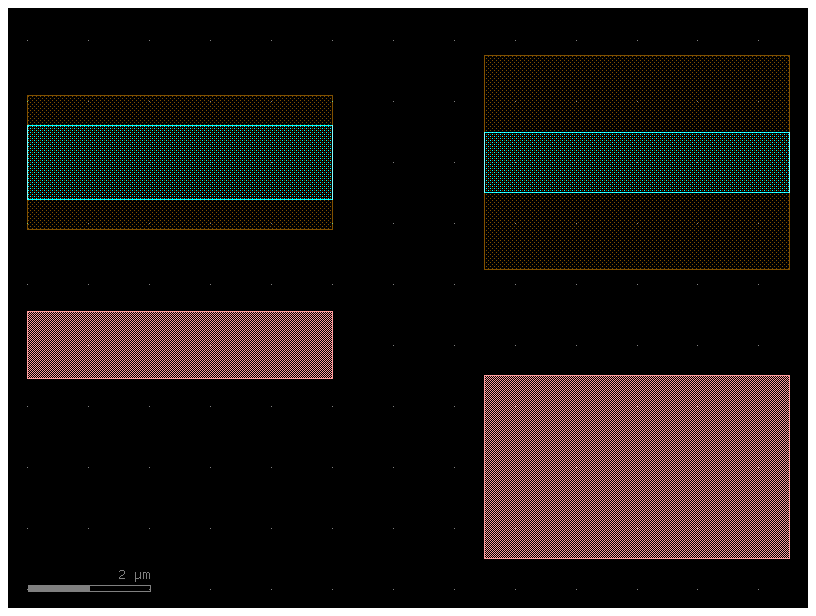

In [1]:
# Create our first CrossSection
import gdsfactory as gf

s0 = gf.Section(width=1.2, offset=0, layer=(2, 0), name="core", port_names=("o1", "o2"))
s1 = gf.Section(width=2.2, offset=0, layer=(3, 0), name="etch")
s2 = gf.Section(width=1.1, offset=3, layer=(1, 0), name="wg2")
X1 = gf.CrossSection(sections=[s0, s1, s2])

# Create the second CrossSection that we want to transition to
s0 = gf.Section(width=1, offset=0, layer=(2, 0), name="core", port_names=("o1", "o2"))
s1 = gf.Section(width=3.5, offset=0, layer=(3, 0), name="etch")
s2 = gf.Section(width=3, offset=5, layer=(1, 0), name="wg2")
X2 = gf.CrossSection(sections=[s0, s1, s2])

# To show the cross-sections, let's create two Paths and
# create Components by extruding them
P1 = gf.path.straight(length=5)
P2 = gf.path.straight(length=5)
wg1 = gf.path.extrude(P1, X1)
wg2 = gf.path.extrude(P2, X2)

# Place both cross-section Components and quickplot them
c = gf.Component()
wg1ref = c << wg1
wg2ref = c << wg2
wg2ref.movex(7.5)

c.plot()

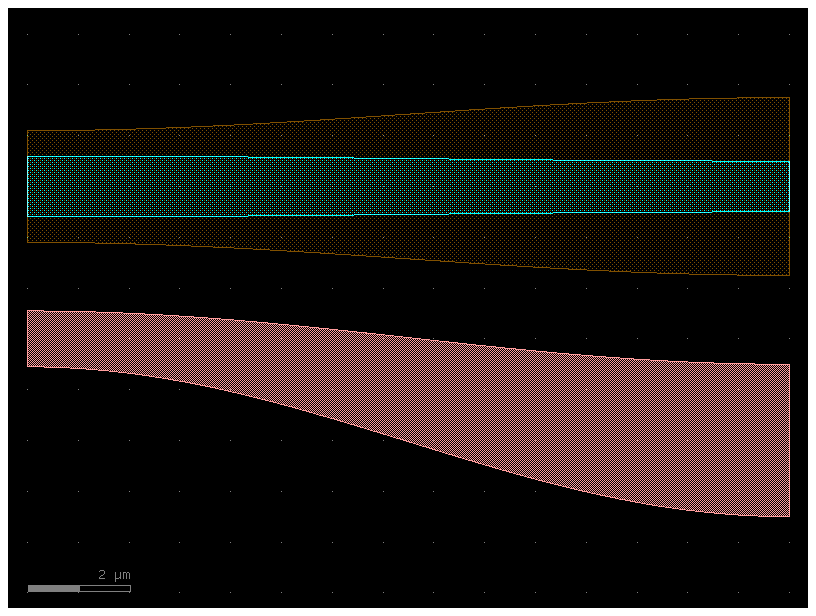

In [2]:
# Create the transitional CrossSection
Xtrans = gf.path.transition(cross_section1=X1, cross_section2=X2, width_type="sine")

# Create a Path for the transitional CrossSection to follow
P3 = gf.path.straight(length=15, npoints=100)

# Use the transitional CrossSection to create a Component
straight_transition = gf.path.extrude_transition(P3, Xtrans)
straight_transition.plot()

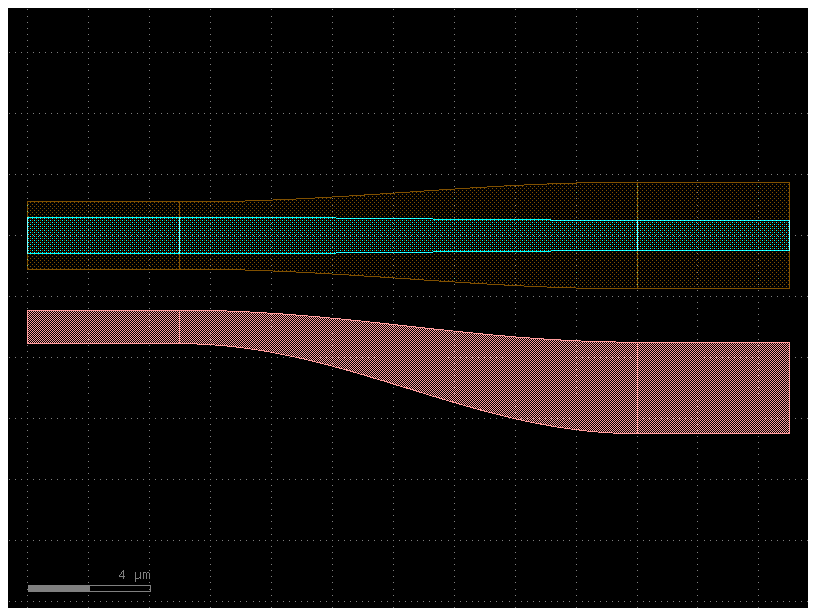

In [3]:
c = gf.Component("transition_demo")

wg1ref = c << wg1
wgtref = c << straight_transition
wg2ref = c << wg2

wgtref.connect("o1", wg1ref.ports["o2"])
wg2ref.connect("o1", wgtref.ports["o2"])

c.plot()

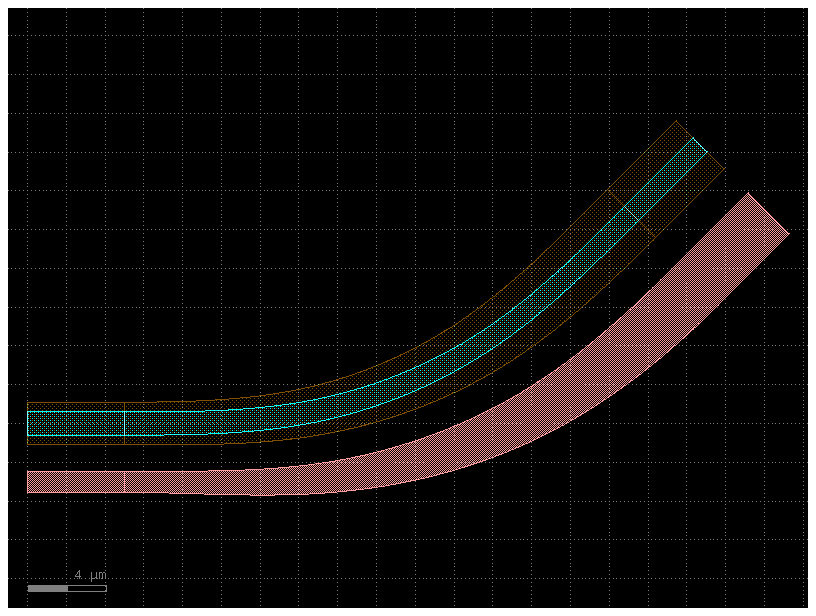

In [4]:
# Transition along a curving Path
P4 = gf.path.euler(radius=25, angle=45, p=0.5, use_eff=False)
wg_trans = gf.path.extrude_transition(P4, Xtrans)

c = gf.Component("demo_transition")
wg1_ref = c << wg1  # First cross-section Component
wg2_ref = c << wg2
wgt_ref = c << wg_trans

wgt_ref.connect("o1", wg1_ref.ports["o2"])
wg2_ref.connect("o1", wgt_ref.ports["o2"])

c.plot()